In [2]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [1]:
df0<-data.frame(pos=0,time=c(2.5,3.5,3.2,2.55,3.1,3.12))
df3<-data.frame(pos=3,time=c(1.8,1.28,2.5,2.3,2.4,2.04,2.5,2.2))
df4<-data.frame(pos=4,time=c(2,2.2,2.01,2.7,NA,2,2.72,1.9,2,2.05))
df8<-data.frame(pos=8,time=c(1.5,1.8,2.1,1.8,2,1.2,2,NA,1.4,2))
df_roja<-rbind(df0, df3, df4,df8)
head(df_roja)

,pos,time
,<dbl>,<dbl>
1,0,2.50
2,0,3.50
3,0,3.20
4,0,2.55
5,0,3.10
6,0,3.12


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


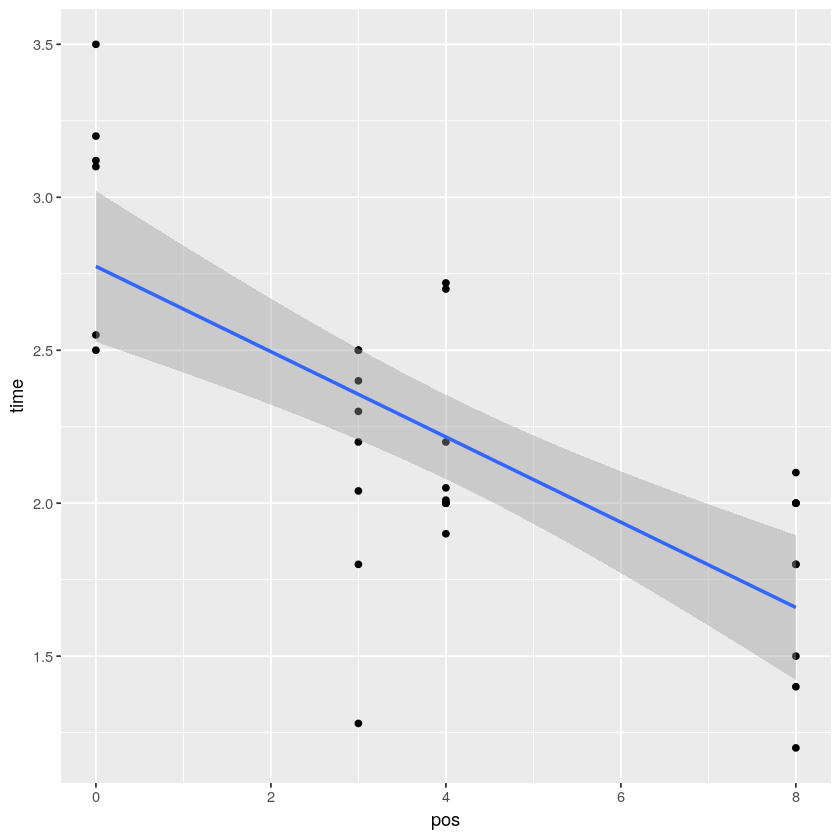

In [5]:
ggplot(df_roja, aes(x=pos, y=time))+geom_point()+geom_smooth(method = 'lm')

In [6]:
set.seed(12)
idx<-sample(1:nrow(df_roja), nrow(df_roja)*0.7)

df_roja_train <- df_roja[idx,]
df_roja_test <- df_roja[-idx,]
summary(df_roja_train)
summary(df_roja_test)

      pos             time      
 Min.   :0.000   Min.   :1.280  
 1st Qu.:3.000   1st Qu.:2.000  
 Median :4.000   Median :2.075  
 Mean   :4.391   Mean   :2.229  
 3rd Qu.:8.000   3rd Qu.:2.500  
 Max.   :8.000   Max.   :3.500  
                 NA's   :1      

      pos             time      
 Min.   :0.000   Min.   :1.200  
 1st Qu.:3.500   1st Qu.:1.925  
 Median :4.000   Median :2.005  
 Mean   :3.909   Mean   :2.133  
 3rd Qu.:4.000   3rd Qu.:2.475  
 Max.   :8.000   Max.   :3.200  
                 NA's   :1      

### Modelo regresión lineal sencillo

In [7]:
model <- lm(df_roja_train, formula=time~pos)
summary(model)


Call:
lm(formula = time ~ pos, data = df_roja_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09786 -0.20286  0.02824  0.22824  0.75848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.7415     0.1529  17.933 8.57e-14 ***
pos          -0.1212     0.0299  -4.054  0.00062 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4033 on 20 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.451,	Adjusted R-squared:  0.4236 
F-statistic: 16.43 on 1 and 20 DF,  p-value: 0.0006204


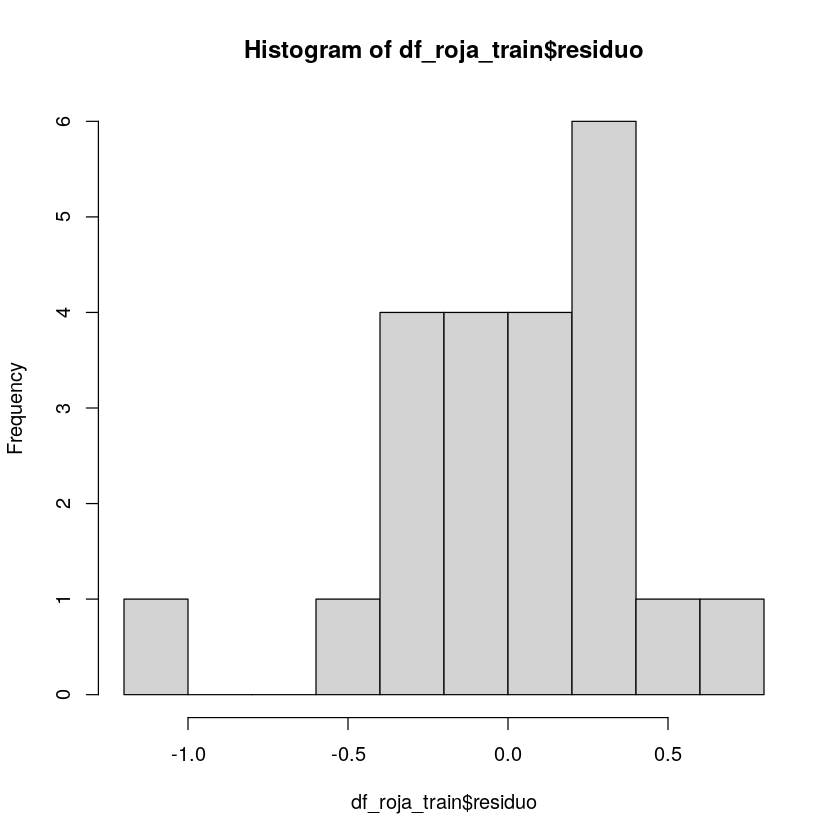

In [9]:
df_roja_train$pred <- predict(model, df_roja_train)
df_roja_train$residuo <- df_roja_train$time - df_roja_train$pred

hist(df_roja_train$residuo,7)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


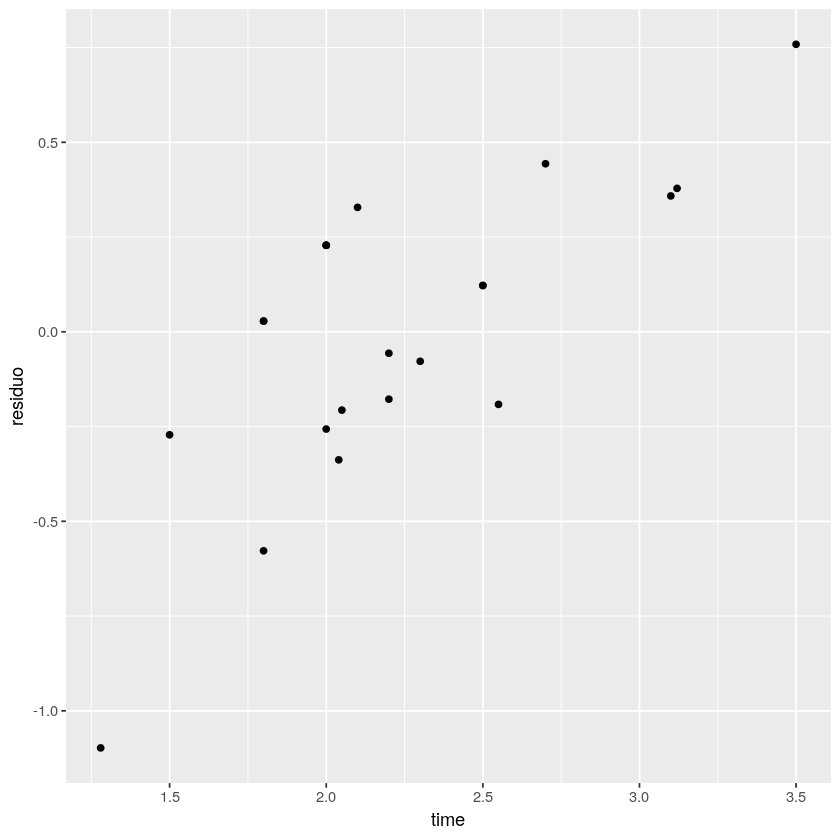

In [12]:
ggplot(df_roja_train, aes(y=residuo, x=time))+geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


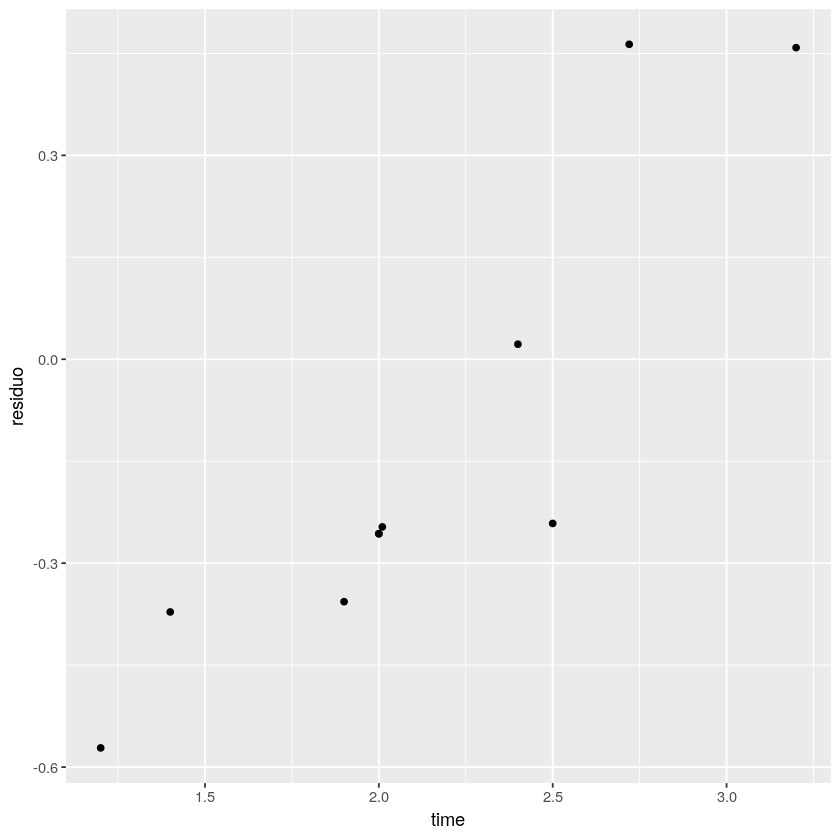

In [14]:
df_roja_test$pred <- predict(model, df_roja_test)
df_roja_test$residuo <- df_roja_test$time - df_roja_test$pred

ggplot(df_roja_test, aes(y=residuo, x=time))+geom_point()

In [25]:
df_roja_train_clean <- na.omit(df_roja_train)
caret::postResample(pred=df_roja_train_clean$pred, obs=df_roja_train_clean$time)

RMSE  Rsquared       MAE 
0.3844972 0.4510450 0.2956824

In [24]:
df_roja_test_clean <- na.omit(df_roja_test)
caret::postResample(pred=df_roja_test_clean$pred, obs=df_roja_test_clean$time)

RMSE  Rsquared       MAE 
0.3561741 0.7722082 0.3245586

In [26]:
model2 <- lm(df_roja_train, formula=time ~ pos+I(pos^2))
summary(model2)


Call:
lm(formula = time ~ pos + I(pos^2), data = df_roja_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92890 -0.09699  0.07540  0.14568  0.65991 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.03460    0.17666  17.178 4.96e-13 ***
pos         -0.35505    0.09462  -3.753  0.00135 ** 
I(pos^2)     0.02661    0.01034   2.574  0.01860 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3563 on 19 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.593,	Adjusted R-squared:  0.5501 
F-statistic: 13.84 on 2 and 19 DF,  p-value: 0.0001957


In [28]:
df_roja_test$pred <- predict(model2, df_roja_test)
df_roja_test$residuo <- df_roja_test$time - df_roja_test$pred
df_roja_test_clean <- na.omit(df_roja_test)
caret::postResample(pred=df_roja_test_clean$pred, obs=df_roja_test_clean$time)

RMSE  Rsquared       MAE 
0.3960431 0.5378656 0.3015363

Warning message:
“Removed 1 rows containing missing values (geom_point).”


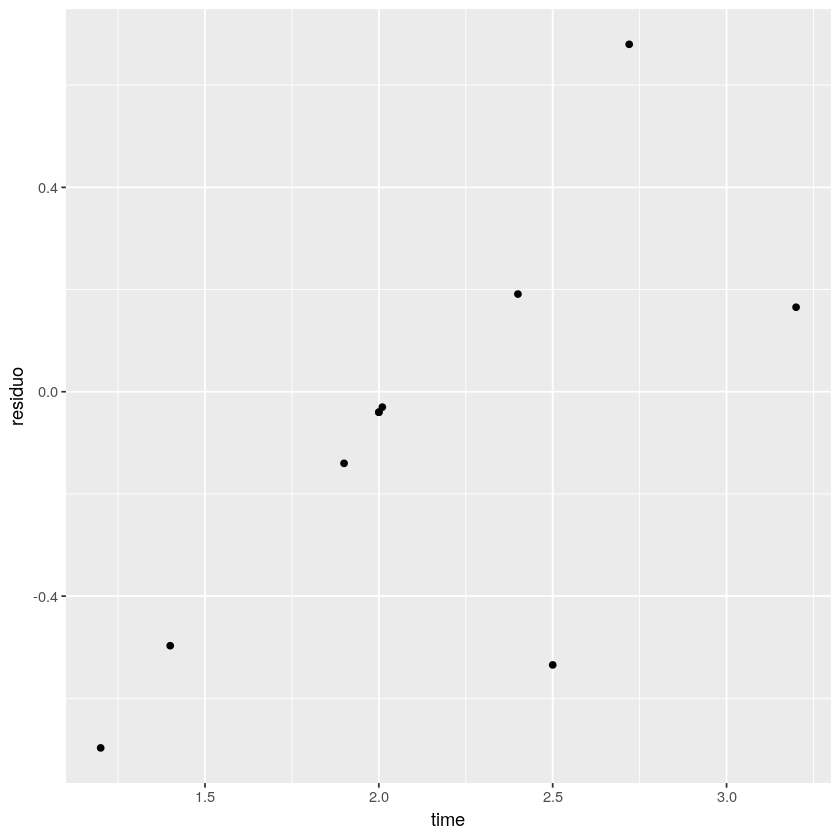

In [29]:
ggplot(df_roja_test, aes(y=residuo, x=time))+geom_point()

In [31]:
model3 <- lm(df_roja_train, formula=time ~ pos+I(pos^2)+I(pos^3))
summary(model3)


Call:
lm(formula = time ~ pos + I(pos^2) + I(pos^3), data = df_roja_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8086 -0.1620  0.0425  0.1871  0.4625 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.06750    0.17277  17.755 7.45e-13 ***
pos         -0.93201    0.39983  -2.331   0.0316 *  
I(pos^2)     0.26422    0.16058   1.645   0.1172    
I(pos^3)    -0.02077    0.01401  -1.483   0.1555    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3455 on 18 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6373,	Adjusted R-squared:  0.5768 
F-statistic: 10.54 on 3 and 18 DF,  p-value: 0.0003144


In [32]:
df_roja_test$pred <- predict(model3, df_roja_test)
df_roja_test$residuo <- df_roja_test$time - df_roja_test$pred
df_roja_test_clean <- na.omit(df_roja_test)
caret::postResample(pred=df_roja_test_clean$pred, obs=df_roja_test_clean$time)

RMSE  Rsquared       MAE 
0.4066945 0.5952689 0.3705357

Warning message:
“Removed 1 rows containing missing values (geom_point).”


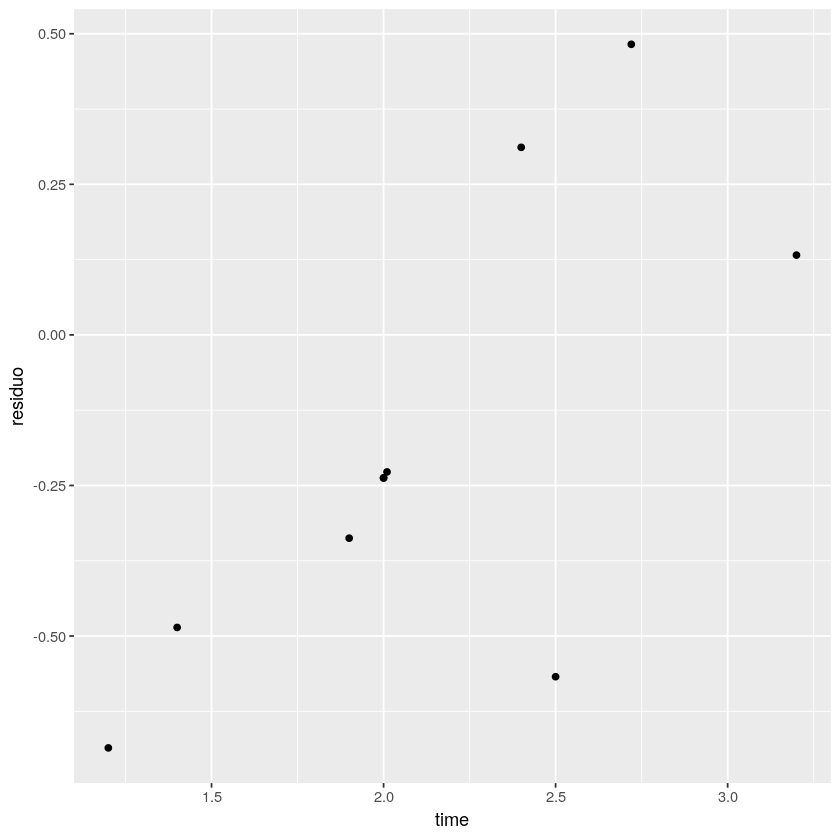

In [33]:
ggplot(df_roja_test, aes(y=residuo, x=time))+geom_point()

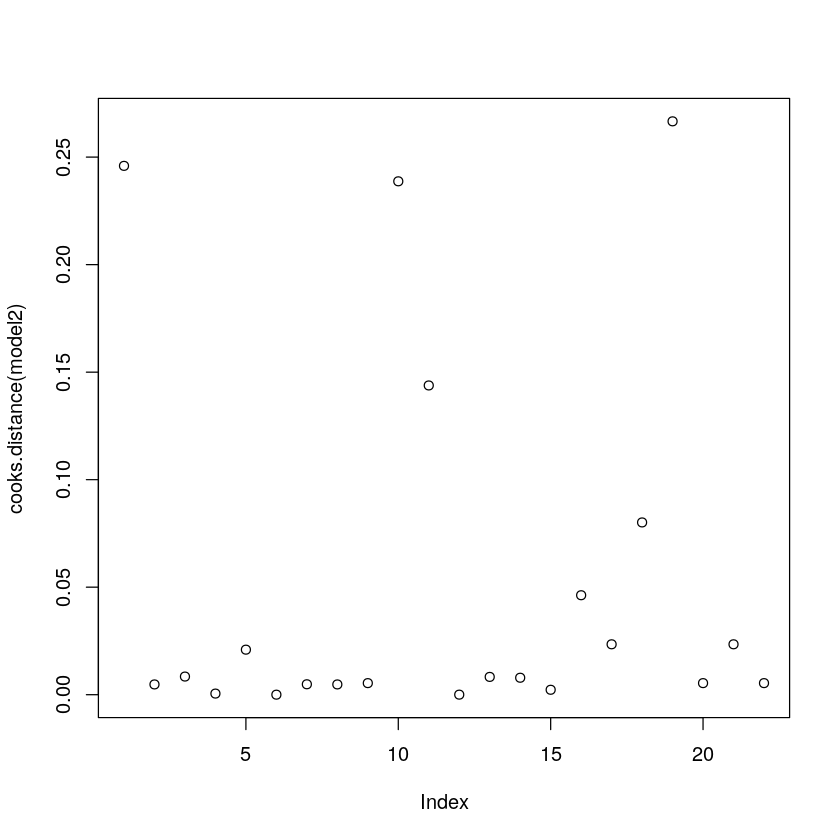

In [36]:
plot(cooks.distance(model2))

In [40]:
model4 <- lm(df_roja_train[cooks.distance(model2)<=0.05,], formula=time~ pos+I(pos^2))
summary(model4)


Call:
lm(formula = time ~ pos + I(pos^2), data = df_roja_train[cooks.distance(model2) <= 
    0.05, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39187 -0.14224  0.03295  0.15492  0.30813 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.917117   0.122057  23.900 3.97e-12 ***
pos         -0.313682   0.065652  -4.778 0.000361 ***
I(pos^2)     0.023978   0.007206   3.327 0.005453 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2131 on 13 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7305 
F-statistic: 21.33 on 2 and 13 DF,  p-value: 7.839e-05


In [41]:
df_roja_test$pred <- predict(model3, df_roja_test)
df_roja_test$residuo <- df_roja_test$time - df_roja_test$pred
df_roja_test_clean <- na.omit(df_roja_test)
caret::postResample(pred=df_roja_test_clean$pred, obs=df_roja_test_clean$time)

RMSE  Rsquared       MAE 
0.4066945 0.5952689 0.3705357

Warning message:
“Removed 1 rows containing missing values (geom_point).”


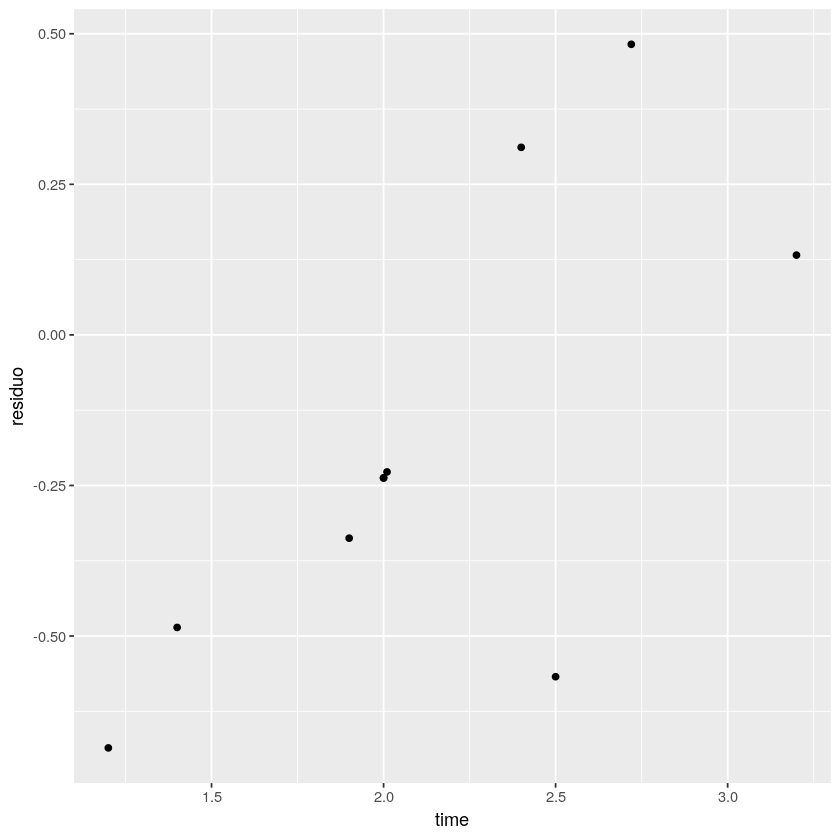

In [42]:
ggplot(df_roja_test, aes(y=residuo, x=time))+geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


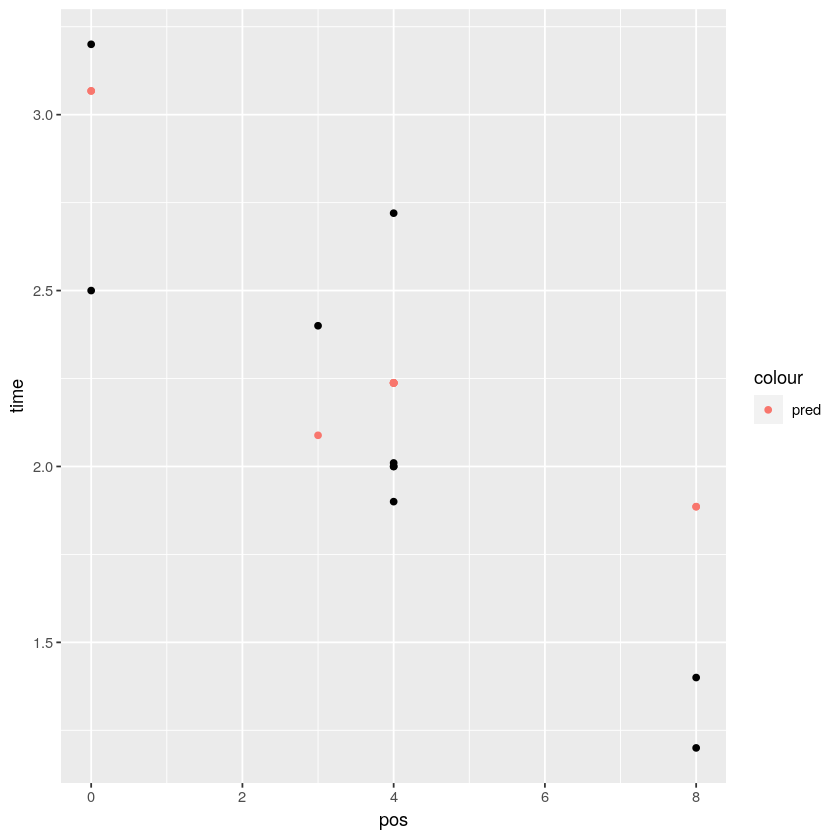

In [48]:
ggplot(df_roja_test, aes(y=time, x=pos))+geom_point()+geom_point(aes(y=pred, color='pred'))

### Bola verde

In [51]:
df0<-data.frame(pos=0,time=c(3.5,3.2,3.2,3,3.2,3.8,3))
df2<-data.frame(pos=2,time=c(2.35,2.8,2.5,2.9,2.8,2.5,2.5,2.9,2.6,2.8))
df5<-data.frame(pos=5,time=c(2.3,2,3,2.3,2,2.2,2.1,2.3,2.1,2.2))
df6<-data.frame(pos=6,time=c(2.8,2.5,2.4,2.9,2.4,2.02,2.8,2.2,2.5,2.4))
df9<-data.frame(pos=9,time=c(1.8,1.2,1.7,2.6,1.5,1.7,1.7,1.8,1.7))


df_verde <- rbind(df0, df2, df5,df6,df9)
df_verde$color<-"verde"
df_roja$color<-"rojo"
df_bola<-rbind(df_verde,df_roja)
df_bola$color<-as.factor(df_bola$color)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


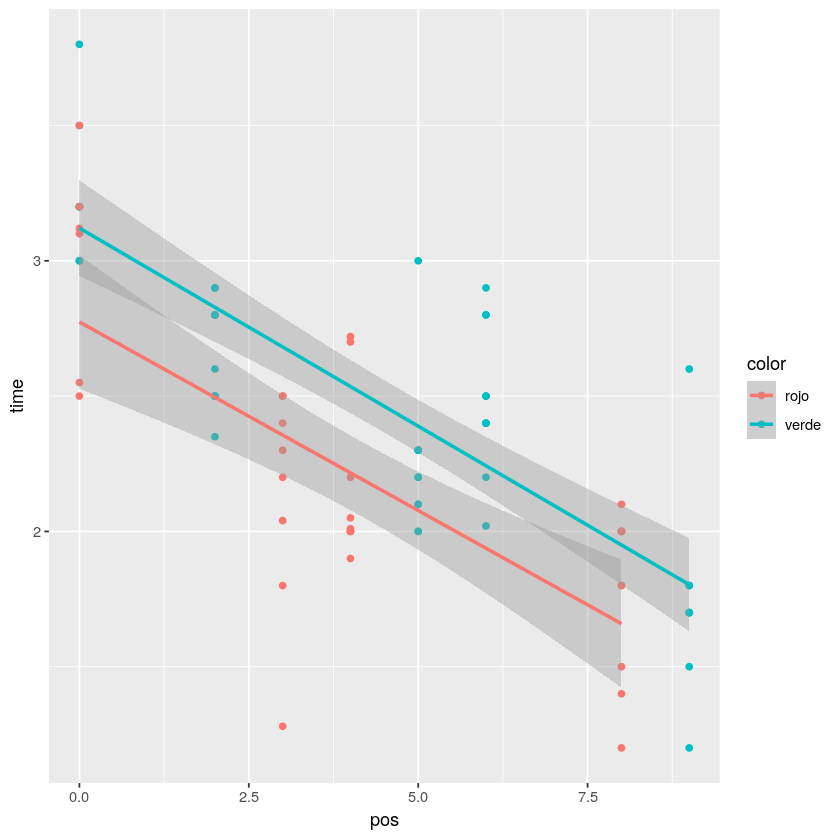

In [54]:
ggplot(df_bola, aes(x=pos, y=time, color=color))+geom_point()+geom_smooth(method='lm')

In [56]:
model <- lm(df_bola, formula=time~pos:color)
summary(model)


Call:
lm(formula = time ~ pos:color, data = df_bola)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17617 -0.23166 -0.05451  0.22102  0.82539 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.97461    0.07396  40.217  < 2e-16 ***
pos:colorrojo  -0.17281    0.01777  -9.725 6.30e-15 ***
pos:colorverde -0.12402    0.01491  -8.321 2.93e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3602 on 75 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.5918,	Adjusted R-squared:  0.5809 
F-statistic: 54.36 on 2 and 75 DF,  p-value: 2.559e-15


Tenemos dos rectas una para la bola roja y otra para la verde.

Las dos bolas tardan exactamente el mismo tiempo en llegar desde la posición 0, tardan 2.97 segundos

Para la bola roja, por cada posición extra, el tiempo disminuye 0.17 segundos
Para la bola verde, por cada posición extra, el tiempo disminuye 0.12 segundos

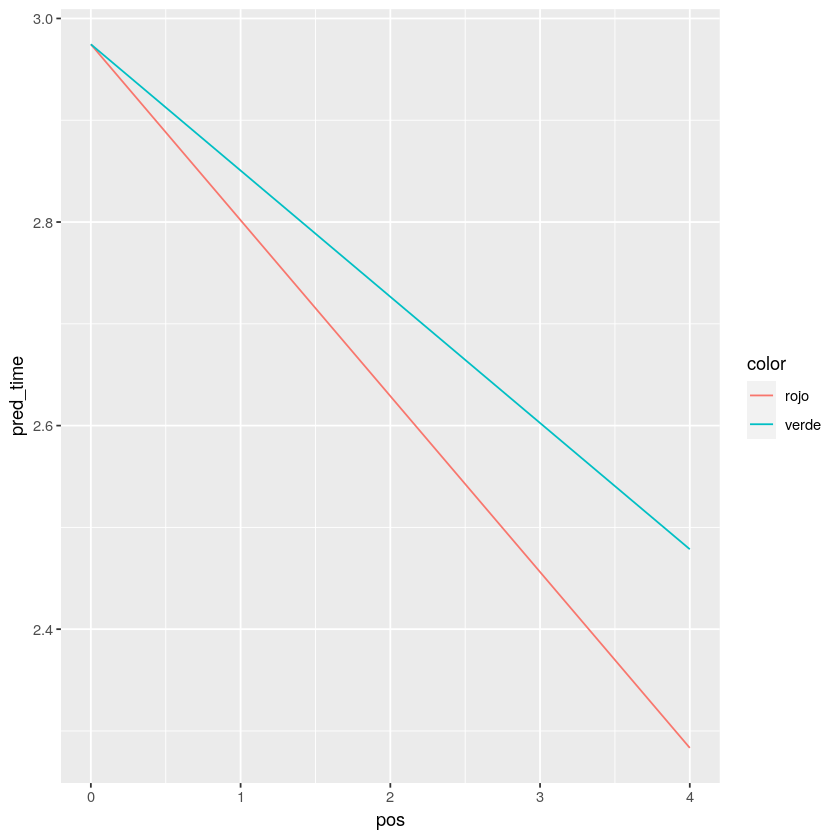

In [65]:
df<-rbind(
data.frame(pos=seq(0,4,by=0.1), color='rojo'),
data.frame(pos=seq(0,4,by=0.1), color='verde')
)    

df$pred_time <- predict(model, df)
#head(df)
ggplot(df, aes(x=pos, y=pred_time, color=color))+geom_line()

In [66]:
model <- lm(df_bola, formula=time~pos+color)
summary(model)


Call:
lm(formula = time ~ pos + color, data = df_bola)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0808 -0.2202 -0.0535  0.1580  0.7851 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.79208    0.08296   33.66  < 2e-16 ***
pos         -0.14376    0.01353  -10.63  < 2e-16 ***
colorverde   0.31670    0.08017    3.95 0.000175 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3472 on 75 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.6207,	Adjusted R-squared:  0.6105 
F-statistic: 61.36 on 2 and 75 DF,  p-value: < 2.2e-16


La bola roja desde la posición 0 va a tardar 2.79
La bola verde desde la posición 0 va a tardar 2.79+0.316

La diferencia de tiempos entre la bola roja y la verde es constante

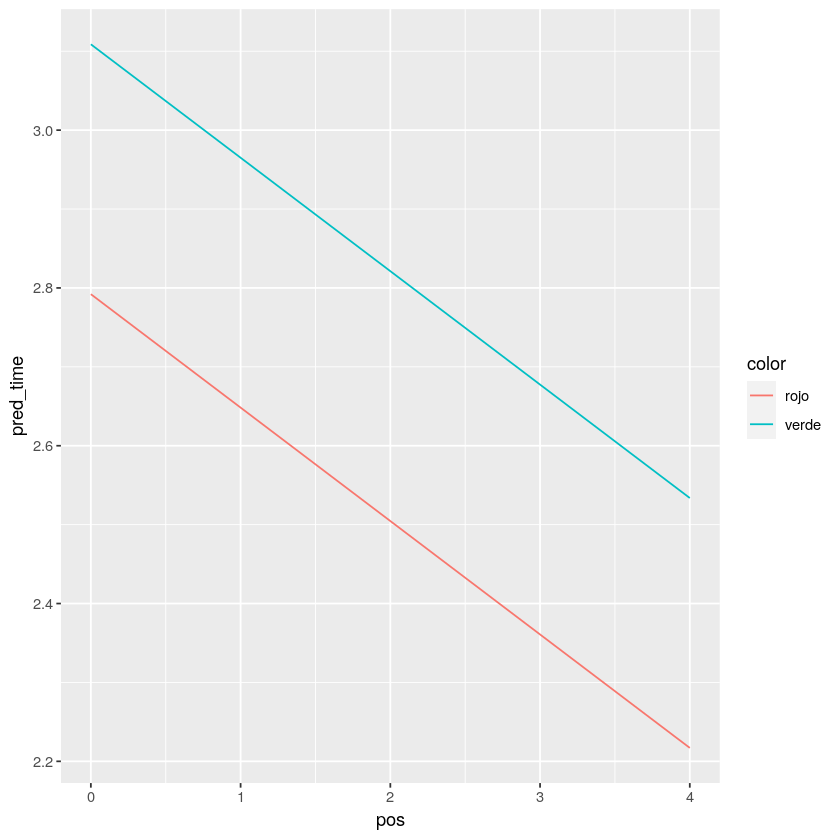

In [67]:
df<-rbind(
data.frame(pos=seq(0,4,by=0.1), color='rojo'),
data.frame(pos=seq(0,4,by=0.1), color='verde')
)    

df$pred_time <- predict(model, df)
#head(df)
ggplot(df, aes(x=pos, y=pred_time, color=color))+geom_line()

In [71]:
model <- lm(df_bola, formula=time~pos*color)
#model <- lm(df_bola, formula=time~pos+color+pos:color)
summary(model)


Call:
lm(formula = time ~ pos * color, data = df_bola)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.07586 -0.22098 -0.04917  0.15752  0.79672 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.774000   0.110494  25.105  < 2e-16 ***
pos            -0.139379   0.022210  -6.275 2.13e-08 ***
colorverde      0.346875   0.145295   2.387   0.0195 *  
pos:colorverde -0.007021   0.028111  -0.250   0.8035    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3494 on 74 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.621,	Adjusted R-squared:  0.6056 
F-statistic: 40.41 on 3 and 74 DF,  p-value: 1.417e-15


La bola roja  desde la posición 0 tardará 2.77 segundos
La bola verde desde la posición 0 tardará 2.77+0.34 segundos

La bola roja  por cada pos adicional tardará 0.1393 segundos menos
La bola verde por cada pos adicional tardará (0.139379+0.007) segundos menos

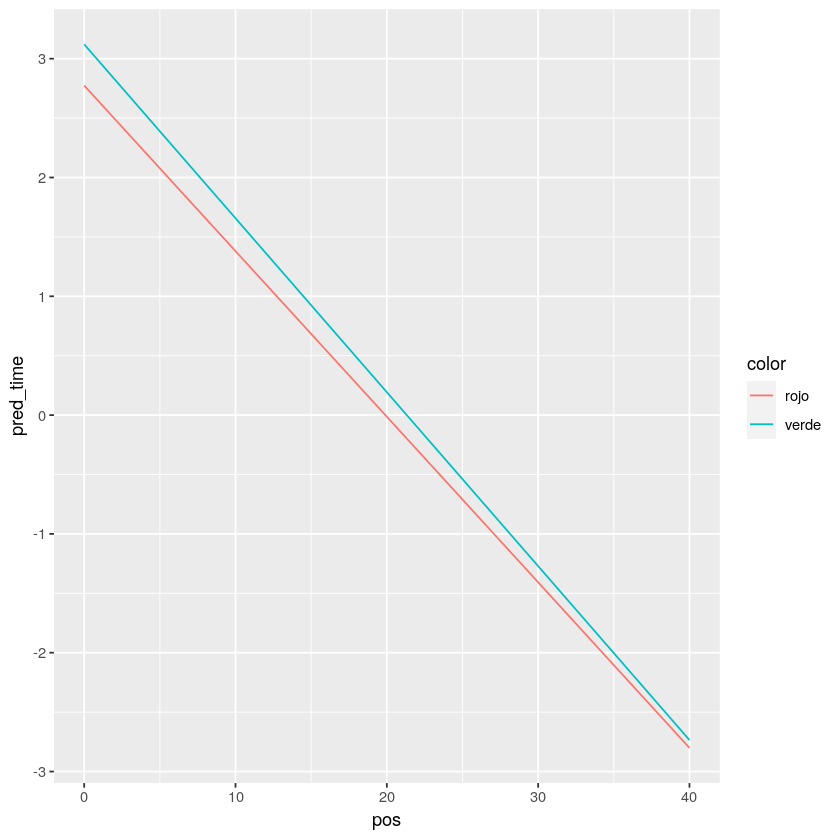

In [73]:
df<-rbind(
data.frame(pos=seq(0,40,by=0.1), color='rojo'),
data.frame(pos=seq(0,40,by=0.1), color='verde')
)    

df$pred_time <- predict(model, df)
#head(df)
ggplot(df, aes(x=pos, y=pred_time, color=color))+geom_line()